In [1]:
# https://docs.xarray.dev/en/latest/getting-started-guide/quick-overview.html

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime


In [3]:
data = xr.DataArray(np.random.randn(2,3), dims=("x","y"), coords={"x": [10,20]})

In [4]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.71250671, -1.06703795,  1.98870513],
       [ 0.0538885 , -0.21459136, -1.04222139]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [2]:
# SATELLITE_ZARR_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

SATELLITE_ZARR_PATH = "/home/ben/eumetsat_seviri_hrv_uk.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)

<xarray.Dataset>
Dimensions:  (time: 173624, y: 891, x: 1843)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
    x_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
  * y        (y) float32 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(22, 891, 1843), meta=np.ndarray>


In [13]:
subset = (
    dataset
    # Select a time slice using 'sel' (short for 'select').
    .sel(
        time=slice(
            "2021-06-01 12:00",
            "2021-06-01 12:55",
        )
    )
)

## Creating a subset based on time

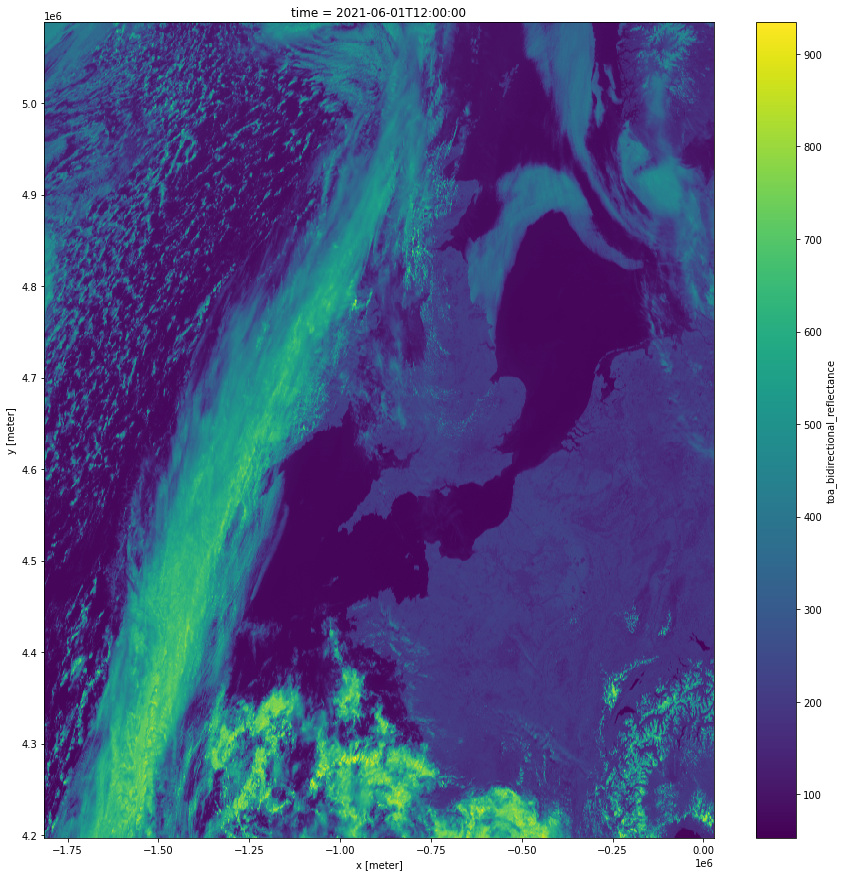

In [3]:
dataset['data'].sel(time="2021-06-01 12:00").plot(figsize=(15,15))

In [ ]:
dataset[]

### Crop based on coordinates 

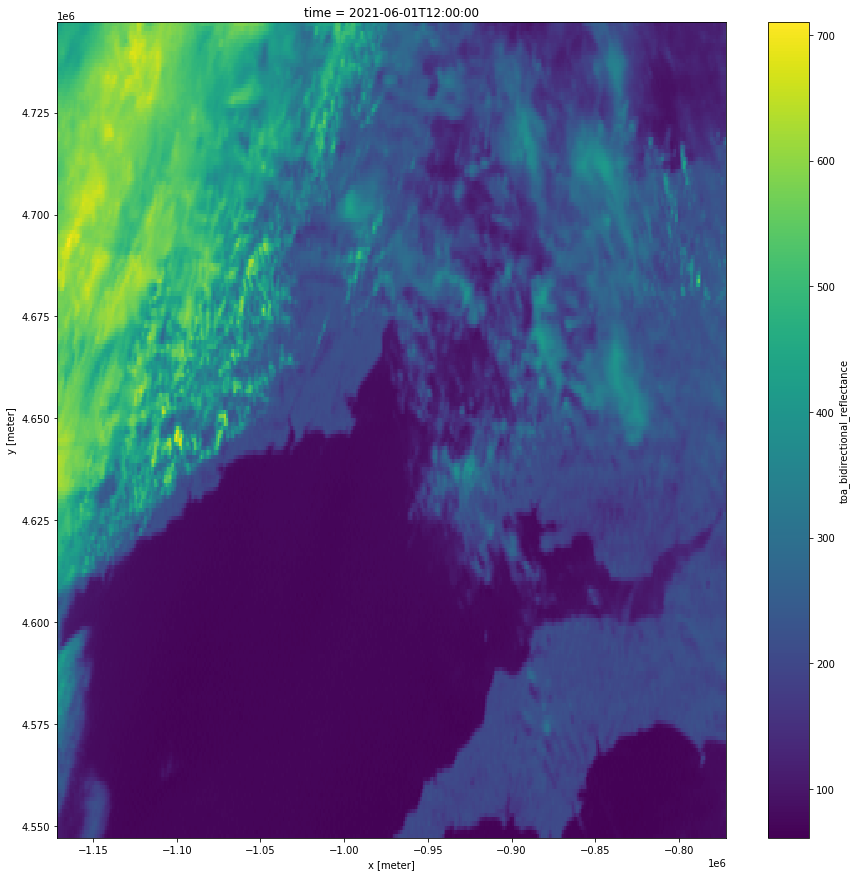

In [23]:
# time: 173624, y: 891, x: 1843)

crop = (
    dataset
    .sel(
        time="2021-06-01 12:00"
    )
    .isel(
        x=slice(800,1200),
        y=slice(350,550)
    )
)

crop['data'].plot(figsize=(15,15))